# Ames Housing Price Prediction - Part 2

## Content

- [Data Dictionary](#10.0-Data-Dictionary)
- [Cleaned Data Import](#11.0-Cleaned-Data-Import)
- [Preprocessing](#12.0-Preprocessing)
- [Modelling](#13.0-Modelling)
- [Evaluation of Analysis](#14.0-Evaluation-of-Analysis)
- [Conclusion and Recommendation](#15.0-Conclusion-and-Recommendation)
- [Export Data for Prediction](#16.0-Export-Data-for-Prediction)

## 10.0 Data Dictionary

The below are the cleaned data dictionary that will be used for the modeling and prediction.

|Feature|Type|Dataset|Description|
|---|---|---|---|
|ms_zoning|object|train & test|General zoning classification of the sale| 
|lot_frontage|float| train & test | Linear feet of street connected to property|
|street|object| train & test | type of road access to property|
|land_contour|object| train & test | Flatness of property|
|overall_qual|int| train & test | Rates the overall material and finish of the house (Rating from 1-10)|
|roof_matl|object| train & test | Roof material|
|exterior_1st|object| train & test | Exterior covering on house|
|mas_vnr_type|object| train & test | Masonry veneer type|
|mas_vnr_area|float| train & test | Masonry veneer area|
|foundation|object| train & test | Type of foundation of the house|
|bsmt_qual|int| train & test | Basement height (Rating from 0 - 6)|
|bsmt_exposure|int| train & test | Walkout or garden level walls (Rating from 0-4)|
|bsmtfin_sf_1|float| train & test | Type 1 finished in square feet|
|heating|object| train & test | Type of heating in the house|
|heating_qc|int| train & test | Heating quality or condition|
|central_air|object| train & test | Central air condition (Y or N)|
|gr_liv_area|int| train & test | Above ground living area square feet|
|full_bath|int| train & test | Full bathrooms above ground|
|fireplace_qu|int| train & test | Fireplace quality (Rating from 0-5)|
|garage_type|object| train & test | Garage location|
|garage_finish|int| train & test | Interior finish of the garage (Rating from 0-3))|
|garage_area|float| train & test | Size of garage in square feet|
|wood_deck_sf|int| train & test | Wood deck area in square feet|
|open_porch_sf|int| train & test | Open porch area in square feet|
|sale_type|object| train & test | Type of sale|
|saleprice|int| train & test | Sale price in $|
|age_built|int| train & test | Age of the house since it was built|
|age_remod|int| train & test | Age of the house since it was modified|
|total_sf|float| train & test | Total square feet of the house|
|open_lot|bool| train & test | Location of the house with 3 side frontage|
|common_lot|bool| train & test | Location of the house with 2 side frontage |
|closed_lot|bool| train & test | Location of the house in cul de sac|
|near_park|bool| train & test | Proximity of house near and adjacent to off-site features |
|near_road|bool| train & test | Proximity of house near and adjacent to feeder and arterial street | 

## 11.0 Cleaned Data Import

In [1]:
#import lib 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error, mean_absolute_error

pd.set_option('display.max_columns',999)
pd.set_option('display.max_rows',100)

In [2]:
#import cleaned dataset and final testing dataset
train = pd.read_csv('../cleaned_data/train_clean.csv',na_values='',keep_default_na=False)

## 12.0 Preprocessing

Datasets that has been cleaned with selected features will be processed for one-hot encoding for categorical variables.

In [3]:
#splitting X, y with saleprice as target
X = train.drop(columns='saleprice')
y = train.saleprice

In [4]:
#check y 
y.head()

0    130500
1    220000
2    109000
3    174000
4    138500
Name: saleprice, dtype: int64

In [5]:
print(f'Mean Saleprice of Units : {y.mean()}')

Mean Saleprice of Units : 181382.41870714986


In [6]:
X.columns

Index(['ms_zoning', 'lot_frontage', 'street', 'land_contour', 'overall_qual',
       'roof_matl', 'exterior_1st', 'mas_vnr_type', 'mas_vnr_area',
       'foundation', 'bsmt_qual', 'bsmt_exposure', 'bsmtfin_sf_1', 'heating',
       'heating_qc', 'central_air', 'gr_liv_area', 'full_bath', 'fireplace_qu',
       'garage_type', 'garage_finish', 'garage_area', 'wood_deck_sf',
       'open_porch_sf', 'sale_type', 'age_built', 'age_remod', 'total_sf',
       'open_lot', 'common_lot', 'closed_lot', 'near_park', 'near_road'],
      dtype='object')

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2042 entries, 0 to 2041
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ms_zoning      2042 non-null   object 
 1   lot_frontage   2042 non-null   float64
 2   street         2042 non-null   object 
 3   land_contour   2042 non-null   object 
 4   overall_qual   2042 non-null   int64  
 5   roof_matl      2042 non-null   object 
 6   exterior_1st   2042 non-null   object 
 7   mas_vnr_type   2042 non-null   object 
 8   mas_vnr_area   2042 non-null   float64
 9   foundation     2042 non-null   object 
 10  bsmt_qual      2042 non-null   int64  
 11  bsmt_exposure  2042 non-null   int64  
 12  bsmtfin_sf_1   2042 non-null   float64
 13  heating        2042 non-null   object 
 14  heating_qc     2042 non-null   int64  
 15  central_air    2042 non-null   object 
 16  gr_liv_area    2042 non-null   int64  
 17  full_bath      2042 non-null   int64  
 18  fireplac

In [8]:
#function to change to one-hot encode categorical object
cat_df = X.select_dtypes(exclude=['number','bool'])

def one_hot(dataframe):
    for i in dataframe:
        dataframe = pd.get_dummies(dataframe, drop_first=True)
        return dataframe

In [9]:
#merge get-dummied data in original dat set
X = pd.concat([X,one_hot(cat_df)],axis=1)
#drop original columns
X = X.drop(columns=cat_df)

len(X.columns)

74

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2042 entries, 0 to 2041
Data columns (total 74 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lot_frontage          2042 non-null   float64
 1   overall_qual          2042 non-null   int64  
 2   mas_vnr_area          2042 non-null   float64
 3   bsmt_qual             2042 non-null   int64  
 4   bsmt_exposure         2042 non-null   int64  
 5   bsmtfin_sf_1          2042 non-null   float64
 6   heating_qc            2042 non-null   int64  
 7   gr_liv_area           2042 non-null   int64  
 8   full_bath             2042 non-null   int64  
 9   fireplace_qu          2042 non-null   int64  
 10  garage_finish         2042 non-null   int64  
 11  garage_area           2042 non-null   float64
 12  wood_deck_sf          2042 non-null   int64  
 13  open_porch_sf         2042 non-null   int64  
 14  age_built             2042 non-null   int64  
 15  age_remod            

Features of different scales are standardized for consistency in modelling. One-hot encoded columns are combinsed after since it has been scaled as 0 and 1. 

In [11]:
#temporary df for standadisation
to_ss = X.select_dtypes(exclude=['uint8','bool'])
#temp df for one hot encoded columns
tonot_ss = X.select_dtypes(include=['uint8','bool'])

In [12]:
to_ss.head()

,lot_frontage,overall_qual,mas_vnr_area,bsmt_qual,bsmt_exposure,bsmtfin_sf_1,heating_qc,gr_liv_area,full_bath,fireplace_qu,garage_finish,garage_area,wood_deck_sf,open_porch_sf,age_built,age_remod,total_sf
0,69.0552,6,289.0,3,1,533.0,5,1479,2,0,2,475.0,0,44,34,5,2204.0
1,43.0000,7,132.0,4,1,637.0,5,2122,2,3,2,559.0,0,74,13,12,3035.0
2,68.0000,5,0.0,3,1,731.0,3,1057,1,0,1,246.0,0,52,57,3,2114.0
3,73.0000,5,0.0,4,1,0.0,4,1444,2,0,3,400.0,100,0,4,3,1828.0
4,82.0000,6,0.0,2,1,0.0,3,1445,2,0,1,484.0,0,59,110,17,2121.0


In [13]:
tonot_ss.head()

,open_lot,common_lot,closed_lot,near_park,near_road,ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,land_contour_HLS,land_contour_Low,land_contour_Lvl,roof_matl_Membran,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_GasW,heating_Grav,heating_OthW,heating_Wall,central_air_Y,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_NA,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,False,False,True,False,False,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,False,False,True,False,False,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,False,True,False,False,False,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,False,True,False,False,False,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,False,True,False,False,False,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [14]:
#standardised columns
sc = StandardScaler()
ss_train = sc.fit_transform(to_ss)
#transform to dataframe
ss_train = pd.DataFrame(ss_train, columns=to_ss.columns)
#merge both standardised columns and one hot encoded columns
test_ss = pd.concat([ss_train,tonot_ss],axis=1)

test_ss.head()

,lot_frontage,overall_qual,mas_vnr_area,bsmt_qual,bsmt_exposure,bsmtfin_sf_1,heating_qc,gr_liv_area,full_bath,fireplace_qu,garage_finish,garage_area,wood_deck_sf,open_porch_sf,age_built,age_remod,total_sf,open_lot,common_lot,closed_lot,near_park,near_road,ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,land_contour_HLS,land_contour_Low,land_contour_Lvl,roof_matl_Membran,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_GasW,heating_Grav,heating_OthW,heating_Wall,central_air_Y,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_NA,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,0.015419,-0.076465,1.136444,-0.548157,-0.585327,0.217424,0.873859,-0.031135,0.773738,-0.973758,0.309125,0.011160,-0.745558,-0.048833,-0.069010,-0.886399,-0.442285,False,False,True,False,False,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,-1.298077,0.626875,0.206469,0.568946,-0.585327,0.453948,0.873859,1.299469,0.773738,0.687407,0.309125,0.402788,-0.745558,0.409078,-0.764171,-0.553341,0.645784,False,False,True,False,False,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,-0.037776,-0.779805,-0.575420,-0.548157,-0.585327,0.667730,-1.201048,-0.904408,-1.048607,-0.973758,-0.804162,-1.056491,-0.745558,0.073276,0.692356,-0.981558,-0.560126,False,True,False,False,False,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,0.214284,-0.779805,-0.575420,0.568946,-0.585327,-0.994765,-0.163594,-0.103563,0.773738,-0.973758,1.422412,-0.338507,0.055320,-0.720437,-1.062097,-0.981558,-0.934599,False,True,False,False,False,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,0.667992,-0.076465,-0.575420,-1.665261,-0.585327,-0.994765,-1.201048,-0.101493,0.773738,-0.973758,-0.804162,0.053120,-0.745558,0.180122,2.446809,-0.315443,-0.550960,False,True,False,False,False,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1


### 12.1 RFE CV

RFE CV, is an automated feature ranking with recursive feature elimination and cross-validated selection of the best number of features [RFECV](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html). The model will be standardised and tested with OLS (LinearRegression) model for every 74 features and cross-validated to select the features.

In [15]:
#LR instantiated with RFECV
lr = LinearRegression()
select = RFECV(lr,cv=5, scoring='r2')
ss = StandardScaler()

#fit transform
X_RFE = ss.fit_transform(test_ss)
select.fit(X_RFE, y)

print(f'Final Top Features: {select.n_features_}')

Final Top Features: 41


In [16]:
#LR instantiated with RFECV
lr = LinearRegression()
select = RFECV(lr,cv=5, scoring='r2')
ss = StandardScaler()

#fit transform
X_RFE = ss.fit_transform(test_ss)
select.fit(X_RFE, y)

RFECV(cv=5, estimator=LinearRegression(), scoring='r2')

In [17]:
top_feat = X.columns[select.support_]
top_feat

Index(['lot_frontage', 'overall_qual', 'mas_vnr_area', 'bsmt_qual',
       'bsmt_exposure', 'bsmtfin_sf_1', 'heating_qc', 'gr_liv_area',
       'full_bath', 'fireplace_qu', 'garage_area', 'wood_deck_sf',
       'open_porch_sf', 'age_built', 'age_remod', 'total_sf', 'open_lot',
       'common_lot', 'closed_lot', 'near_park', 'ms_zoning_RL', 'ms_zoning_RM',
       'land_contour_HLS', 'roof_matl_WdShngl', 'exterior_1st_BrkFace',
       'exterior_1st_CemntBd', 'exterior_1st_HdBoard', 'exterior_1st_Plywood',
       'exterior_1st_VinylSd', 'exterior_1st_Wd Sdng', 'mas_vnr_type_BrkFace',
       'mas_vnr_type_None', 'mas_vnr_type_Stone', 'foundation_CBlock',
       'foundation_Slab', 'heating_OthW', 'garage_type_Attchd',
       'garage_type_BuiltIn', 'garage_type_Detchd', 'garage_type_NA',
       'sale_type_New'],
      dtype='object')

After completing the automated feature selection, the top features are indicated above. We will study the  detail impact relative features to the saleprice.

## 13.0 Modelling 

### 13.1 Train Test Split

The datasets will be split for train test prior to modeling. The datasets will be separated to 5 parts with an 80:20 ratio. 

In [18]:
#split train test to 80: 20 
X_train, X_test, y_train, y_test = train_test_split(test_ss[top_feat], y, test_size=0.2, random_state=42)

#standardised

sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

print(f'Z_train shape is: {Z_train.shape}')
print(f'y_train shape is: {y_train.shape}')
print(f'Z_test shape is: {Z_test.shape}')
print(f'y_test shape is: {y_test.shape}')

Z_train shape is: (1633, 41)
y_train shape is: (1633,)
Z_test shape is: (409, 41)
y_test shape is: (409,)


### 13.2 Linear Regression

In [19]:
#split train test to 80: 20 
X_train, X_test, y_train, y_test = train_test_split(test_ss[top_feat], y, test_size=0.2, random_state=42)

In [20]:
#split train test to 80: 20 
X_train, X_test, y_train, y_test = train_test_split(test_ss[top_feat], y, test_size=0.2, random_state=42)

#standardised

sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [21]:
#fitting lr
lr.fit(Z_train, y_train)

#check cross_val_score
cross_val_score(estimator=lr, X=Z_train, y=y_train, cv=5, scoring='r2').mean()

0.8879273733923323

In [22]:
y_pred=lr.predict(Z_test)
train_pred=lr.predict(Z_train)

print(" LR ".center(18, "="))
print(f'LR Train Score: {lr.score(Z_train, y_train)}')
print(f'LR Test Score: {lr.score(Z_test, y_test)}')
print(f'LR Train RMSE: {np.sqrt(mean_squared_error(y_train, train_pred))}')
print(f'LR Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')

======= LR =======
LR Train Score: 0.8961879956252532
LR Test Score: 0.869512942135362
LR Train RMSE: 25793.543939158546
LR Test RMSE: 27497.17167634237


In [23]:
pd.Series(lr.coef_.astype(int), top_feat).sort_values()

age_remod               -5617
age_built               -3852
full_bath               -2523
exterior_1st_Plywood    -2355
foundation_CBlock       -2335
exterior_1st_VinylSd    -2244
exterior_1st_HdBoard    -2190
heating_OthW            -1699
exterior_1st_Wd Sdng    -1472
common_lot              -1459
ms_zoning_RM            -1118
open_lot                 -707
bsmt_qual                1520
closed_lot               1683
open_porch_sf            1762
wood_deck_sf             1874
near_park                1906
exterior_1st_CemntBd     2010
ms_zoning_RL             2235
foundation_Slab          2778
exterior_1st_BrkFace     2915
land_contour_HLS         3367
heating_qc               3502
bsmt_exposure            3771
roof_matl_WdShngl        3820
fireplace_qu             3838
garage_type_NA           4401
garage_type_BuiltIn      4832
lot_frontage             5193
garage_type_Attchd       5618
sale_type_New            6094
garage_type_Detchd       6774
garage_area              6792
mas_vnr_ty

The coefficient of the linear regression model shows that there is a few features that place the huge importance in affecting the saleprice. 

Top five affecting features are the overall_qual, total_sf, gr_live_area, mas_vnr_type_None, and also bsmtfin_sf_1. 

Other negatively affecting the features are age_remod, the age_built, both of which are reflected during EDA for the relationship with saleprice. The full_bath, exterior_1st_Plywood and foundation_CBlock on also negatively affects the predictor.

### 13.3 Ridge Regression

In [24]:
rid_cv = RidgeCV(alphas=np.logspace(-2,5,1000), cv=5, scoring = 'r2')
rid_cv.fit(Z_train, y_train)
ridg_pred=rid_cv.predict(Z_test)

print(" Ridge ".center(19, "="))

print(f'RidgeCV Train Score: {rid_cv.score(Z_train, y_train)}')
print(f'RidgeCV Test Score: {rid_cv.score(Z_test, y_test)}')
print(f'RidgeCV Optimal Alpha: {rid_cv.alpha_}')

print(f'RidgeCV Train RMSE: {np.sqrt(mean_squared_error(y_train, rid_cv.predict(Z_train)))}')
print(f'RidgeCV Test RMSE: {np.sqrt(mean_squared_error(y_test, ridg_pred))}')

====== Ridge ======
RidgeCV Train Score: 0.8960343316505209
RidgeCV Test Score: 0.8701854289277775
RidgeCV Optimal Alpha: 16.99144172034626
RidgeCV Train RMSE: 25812.62686155897
RidgeCV Test RMSE: 27426.224521077114


The ridge regression model shows similar train test score against linear regression model with optimal alpha at 16.99. The RMSE for both train and test set is also reflected similar to linear regression model.

### 13.4 Lasso Regression 

In [25]:
lasso = LassoCV(alphas=np.logspace(-2,5,100), cv=5, max_iter=10e8)
lasso.fit(Z_train, y_train)
lasso_pred=lasso.predict(Z_test)

print(" Lasso ".center(19, "="))
print(f'LassoCV Train Score: {lasso.score(Z_train, y_train)}')
print(f'LassoCV Test Score: {lasso.score(Z_test, y_test)}')
print(f'LassoCV Optimal Alpha: {lasso.alpha_}')

print(f'LassoCV Train RMSE: {np.sqrt(mean_squared_error(y_train, lasso.predict(Z_train)))}')
print(f'LassoCV Test RMSE: {np.sqrt(mean_squared_error(y_test, lasso_pred))}')

====== Lasso ======
LassoCV Train Score: 0.8961792335905402
LassoCV Test Score: 0.869714044384082
LassoCV Optimal Alpha: 12.91549665014884
LassoCV Train RMSE: 25794.632441206453
LassoCV Test RMSE: 27475.974649776017


In [26]:
pd.Series(lasso.coef_.astype(int), top_feat).sort_values()

age_remod               -5608
age_built               -3827
full_bath               -2472
foundation_CBlock       -2335
exterior_1st_Plywood    -2328
exterior_1st_VinylSd    -2161
exterior_1st_HdBoard    -2152
heating_OthW            -1684
exterior_1st_Wd Sdng    -1432
ms_zoning_RM            -1121
open_lot                 -329
common_lot                  0
bsmt_qual                1498
open_porch_sf            1751
wood_deck_sf             1874
near_park                1901
exterior_1st_CemntBd     2026
ms_zoning_RL             2211
foundation_Slab          2745
exterior_1st_BrkFace     2922
closed_lot               3078
land_contour_HLS         3361
heating_qc               3502
bsmt_exposure            3756
roof_matl_WdShngl        3816
fireplace_qu             3834
garage_type_NA           4206
garage_type_BuiltIn      4662
lot_frontage             5165
garage_type_Attchd       5278
mas_vnr_type_BrkFace     5906
sale_type_New            6092
garage_type_Detchd       6460
garage_are

Lasso regression analysis has demonstrated similar score and RMSE on both train and test set against the linear regression model.
LassoCV optimal alpha is at 12.9 alpha. 
The lasso regression above has singled out and show that the common_lot is an unnessary feature. 

## 14.0 Evaluation of Analysis

After comparisons of three different type of models, Linear Regression, Ridge Regression and Lasso Regression, the training and test scores does not show much difference. Ultimately, a simple linear regression model is able to achieve a similar tets score indicating it makes a suitable fit for the prediction model. 

To recall, in Linear Regression model, the r2 score are as follow. 

|                |                    |
|----------------|--------------------|
| LR Train Score | 0.8961879956252532 |
| LR Test Score  | 0.869512942135362  |
| LR Train RMSE  | 25793.543939158546 |
| LR Test RMSE   | 27497.17167634237  |
| LR Cross Val Score  | 0.8879273733923323 |

*The linear regression model shows a relatively close prediction for the test set. The scores are slightly below the training score, and close to the cross valuation score suggesting an overfitted model. However, the error are average of 3% difference.*

*The LR Train RMSE is \\$25,793 at a much higher given the average saleprices is \\$18,382. This difference is price is attributed from the outliers of highly priced units within the neighborhood.*

### 14.1 Statistical Inference 

In [27]:
#dropping comoon_lot cols before fitting in LR
X_train = X_train.drop(columns='common_lot')
X_test = X_test.drop(columns='common_lot')

In [28]:
#remove common lot in top_feature columns
final_feat = [col for col in top_feat if col != 'common_lot']

In [29]:
lr_final = LinearRegression()
lr_final.fit(X_train,y_train)
lr_final.score(X_train,y_train)

0.8961879956252532

In [30]:
pd.Series(lr_final.coef_.astype(int), final_feat).sort_values()

heating_OthW           -48588
exterior_1st_Plywood    -8764
exterior_1st_HdBoard    -6187
open_lot                -5662
age_remod               -5628
foundation_CBlock       -4735
exterior_1st_VinylSd    -4706
exterior_1st_Wd Sdng    -4254
age_built               -3830
ms_zoning_RM            -3085
full_bath               -2501
bsmt_qual                1494
open_porch_sf            1786
wood_deck_sf             1869
heating_qc               3488
bsmt_exposure            3776
fireplace_qu             3832
lot_frontage             5195
ms_zoning_RL             5366
garage_area              6679
mas_vnr_area             9627
exterior_1st_CemntBd     9667
bsmtfin_sf_1            10919
garage_type_Attchd      11446
closed_lot              13185
gr_liv_area             13499
mas_vnr_type_BrkFace    15167
garage_type_Detchd      15380
land_contour_HLS        16975
exterior_1st_BrkFace    17090
total_sf                17325
overall_qual            18659
garage_type_NA          19185
garage_typ

Using the default units of each feature, the coefficient shows the following

1. **roof_matl_WdShngl**: Roof material plays a major price effect in the saleprice of a house. With houses that has wood shingle material are at such a premium of $77,289. Wood shingle roofings are priced at 450dollars to 900dollars per square area due to its robust characteristics [(Modernize Home Service)](https://modernize.com/roof/shingles/cedar). If homesellers does have existing wood shingles roofing, it is a warranted selling factor to promote to homebuyers for a higher selling price.


2. **near_park, ms_zoning_RL**: Housing location would play a role indeed in the price of the house near off-site features. This would appeal to housing near the following locations near parks like StoneBridge, Sawyer, North West Ames, etc. Another collinear driving factor is the neighborhoods near parks are often zoned within some low residential density area. If homesellers house is near-park and in low residential area, that would have a sale price impact of 31,516 dollars and 5,366 dollars respectively.


3. **mas_vnr_type_Stone, mas_vnr_type_BrkFace and mas_vnr_type_None**: For homes that is not located near off site features, the sale price can still be improved if masonry veneer were constructed before. For stone type masonry, it can affect the selling price by additional 31,516 dollars whereas for Brickface it raises 15,167 dollars. However, for homes that does not have any masonry veneer, there is not much affect on the pricing either. A home without masonry veneer still have a good 30,218 dollars weighing on the saleprice. Hence, for homeowners, to have Stone masonry is a benefit, and for Brickface veneer, it is probably better to have without the veneer installation for a better selling price.


4. **garage_type_BuiltIn, garage_type_Attached, garage_type_Detached garage_type_NA** : For garage availability, it shows that there is a strong preference for garages built-in. However, its good news for home sellers without garage, that it would price better than having it attached or detached from the house. 


5. **heating_OthW** : The heating system with hot water or steam heat has a huge negative cut to the saleprice of  48,588 dollars, whereas for other heating systems like floor furnace, forced-air, or even wall furnace at would be a better alternative for home sellers to change to prior to selling of the unit. Either of which, will reduce the effect on the sale price. Cheapest replacement for heating system is the electric that costs about 2,500 dollars which would be worthwhile [(Fixr)](https://www.fixr.com/blog/2018/09/27/a-visual-cost-comparison-of-heating-options-for-your-home/).


6. **open_lot and closed_lot** : The location of the unit within the neighborhood configuration also plays a key role in the saleprice. open_lots like having all three sides of the house to be accessible has a disadvantage, mainly as homebuyers prefer privacy lot, like those in the closed_lot in a Cul De Sac. Homeseller with open lots can consider to create a more private environment to appeal to home buyers. 


7. **exterior_1st_Plywood, exterior_1st_HdBoard, exterior_1st_VinylSd, exterior_1st_WdShng, vs exterior_1st_BrkFace, exterior_1st_CemntBd** : Exterior set up of the house does make an impression on homebuyers as rigid exterior material such as brick face (+\\$15,167) and cement board (+\\$9,667) has a positive impact on the saleprice while on the other hand, plywood (-\\$8,764), hardboard (-\\$6,187), vinylsliding (-\\$4,706) and woodsliding (-\\$4,254) does not bode well as it negatively affects the saleprice.

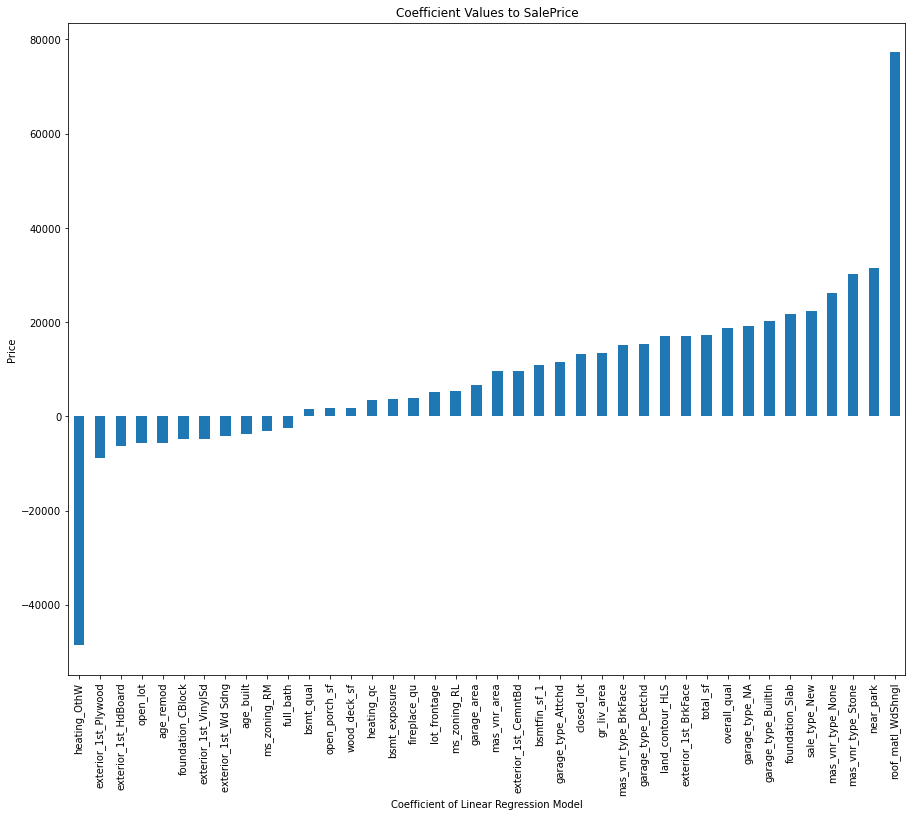

In [31]:
#visualise coef of LR
pd.Series(lr_final.coef_.astype(int), final_feat).sort_values().plot.bar(figsize=(15, 12));
plt.title('Coefficient Values to SalePrice');
plt.xlabel('Coefficient of Linear Regression Model');
plt.ylabel('Price');
plt.savefig('Coefficient Values to SalePrice'.replace(' ', '_'));

## 15.0 Conclusion and Recommendation

### 15.1 Prediction Model

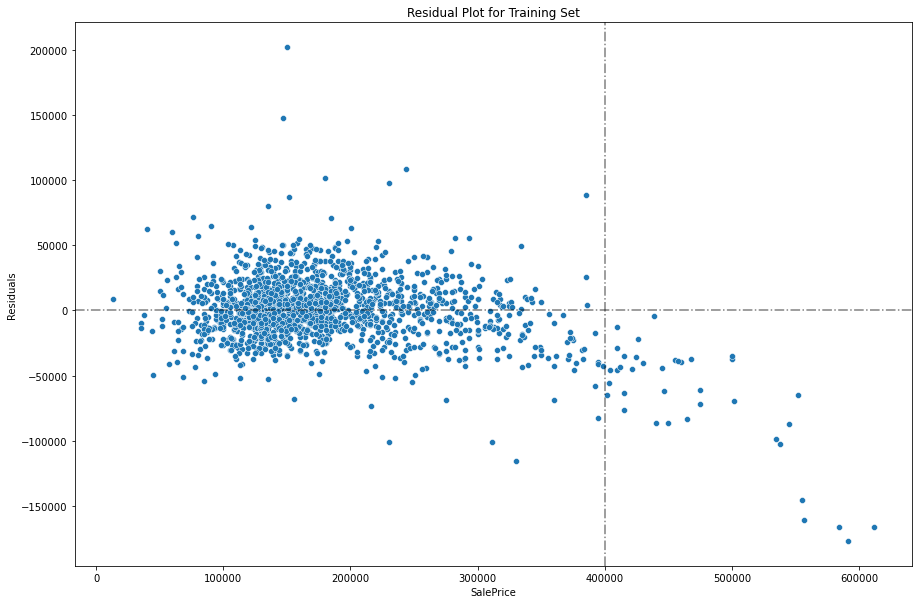

In [32]:

#Calculate residual
residual = lr.predict(Z_train) - y_train

plt.figure(figsize=(15,10))

sns.scatterplot(y=residual, x=y_train)
plt.title('Residual Plot for Training Set')
plt.xlabel('SalePrice')
plt.ylabel('Residuals')
plt.axhline(0, ls= '-.',color='k',alpha = 0.5)
plt.axvline(400000, ls= '-.',color='k',alpha = 0.5)
plt.savefig('Residual Plot on Training Set'.replace(' ', '_'));
plt.show()

*Interpretation: The residual errors are minimal when predicting houses below \\$400,000. The prediction
for houses with higher values at \\$600,000 the prediction model undervalues at least \\$150,000, making it unsuitable to predict high valued units. This could be due to limited number of datasets with higher priced units. The model can be further improved with more datasets of housing with selling price above \\$400,000*

In [33]:
#standard dev of residual
np.std(residual)

25793.543939158535

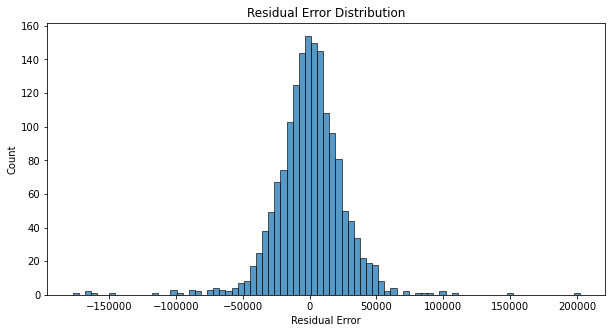

In [34]:
#check for hom
plt.figure(figsize=(10,5))

sns.histplot(x=residual)
plt.title('Residual Error Distribution')
plt.xlabel('Residual Error')
plt.show()

*Interpretation: The residual errors shows normalised error distribution confirming that the model prediction is still reliable.*

Having known the saleprice is skewed, the recommendation to improve the model prediction is to consider the log-scale for saleprice as logarithmic price scales are better than linear price scales at showing less severe price increases or decreases.

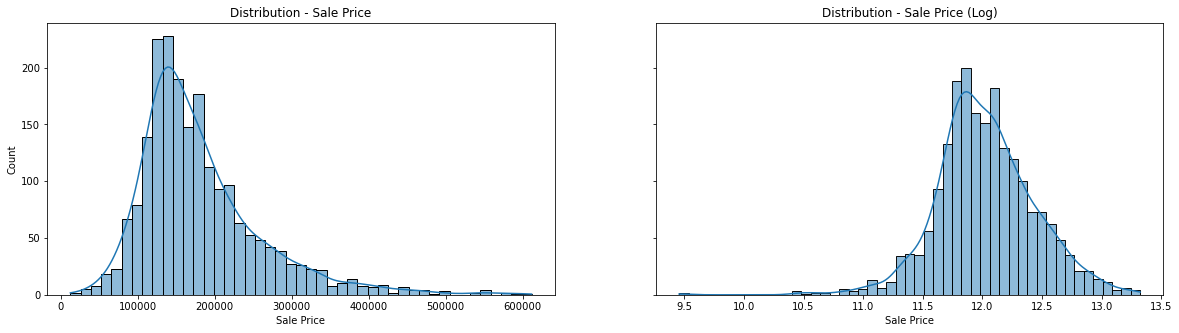

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5), sharey=True)

ax = ax.flatten()
sns.histplot(data=y, kde=True, ax=ax[0]);
ax[0].set_title('Distribution - Sale Price')
ax[0].set_xlabel('Sale Price')
ax[0].set_ylabel('Count')


norm_price = np.log(y)
sns.histplot(data=train, x=norm_price, kde=True, ax=ax[1]);
ax[1].set_title('Distribution - Sale Price (Log)')
ax[1].set_xlabel('Sale Price')
plt.show()

### 15.2 Business Recommendation

After modelling of the features affecting the house pricing in Ames city, we find the folowwing top 5 features that adds monetary value in the saleprice. 
1. Wood Shingles Roofing Material
2. House Location near park / other facilities
3. Masonry Veneer with Stone Material 
4. Garages preferred for Built-In 
5. Foundation of the house with Slab 

Meanwhile, features that hurt the valuation of the housing in summary in below list. 
1. Heating System by hot water or steam heating
2. Exterior material made of ply wood, hard board, vinyl sliding, wood sliding 
3. Location of unit exposed on 3 sides.

With these findings, homesellers are able to evaluate their current housing features and make necessary judgement whether to improve some features to bump the final selling price. We recommend several potential upgrades for the homesellers to upgrade / change their existing roofing material to wood shingles. With the modification \\$450 price per square are only, but a huge valuation bump to \\$$77,289. Another easy feature upgrade recommendation would be changing heating systems for example electric heating. It low costs, effective and minimal renovation required. This is especially important change for homesellers existing unit which are hot water/heating heating system. 

Other renovation feature change that home sellers can consider to do is upgrading the exterior materials to cement boards or brick face. Plywood, hard board, vinyl sliding and wood sliding are not in favour. However the negative price impact are close to $8,000. Homesellers can evaluate the necessity for this cost opportunity before making decisions. 

Additional feature that can bump the saleprice is having a wood deck. For every square feet of wood deck built, there is a \\$1,869 rise to the saleprice. Homesellers can evaluate if their existing units are able to accomodation sufficient space for an additional wood deck without compromising other features. 

In the technical evaluation of this linear regression prediction model, it is predicting with RMSE \\$29,494 (Kaggle Submission) comapared to \\$25,793 during the training set in the model. Nonetheless, it would be better improved with more datas of houses sold above \\$400,000. This existing model is localised for Ames City and further calibration would be required as different region may have different requirements on the housing needs and/or features. 

## 16.0 Export Data for Prediction

In [36]:
X[top_feat].to_csv('../cleaned_data/final_train_data.csv', index=False)
y.to_csv('../cleaned_data/final_train_saleprice.csv', index=False)